<a href="https://colab.research.google.com/github/KatrinaLiqy/SocialBotDetection/blob/main/Datasets_Analysis_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'botsdata/data_csv/final' #change this to whatever folder your code is in
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

print(os.listdir(GOOGLE_DRIVE_PATH))

Mounted at /content/drive
['stream_account_scores.csv', 'botwiki-2019.csv', 'pronbots-2019.csv', 'celebrity-2019.csv', 'botometer-feedback-2019.csv', 'vendor-purchased-2019.csv', 'political-bots-2019.csv', 'gilani-2017.csv', 'verified-2019.csv', 'cresci-17.csv', 'varol-17.csv', 'cresci-rtbust-2019.csv', 'midterm-2018.csv', 'stream_users.csv', 'botwiki-verified.csv']


In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
import sys
sys.path.append(GOOGLE_DRIVE_PATH)
import pandas as pd
import numpy as np

In [ ]:
# 0. varol-icwsm - B733 H1495
# 1. cresci-17 - B7049 H2764
# 2. pronbots - Only Bots 17882
# 3. celebrity - Only Humans 5918
# 4. vendor-purchased - Only Bots 1087
# 5. botometer-feedback - B139 H380
# 6. political-bots - Only Bots 62

In [ ]:
# Seven training datasets
varol = pd.read_csv(GOOGLE_DRIVE_PATH + '/varol-17.csv')
cresci_17 = pd.read_csv(GOOGLE_DRIVE_PATH + '/cresci-17.csv')
pronbots = pd.read_csv(GOOGLE_DRIVE_PATH + '/pronbots-2019.csv')
celebrity = pd.read_csv(GOOGLE_DRIVE_PATH + '/celebrity-2019.csv')
vendor = pd.read_csv(GOOGLE_DRIVE_PATH + '/vendor-purchased-2019.csv')
botometer = pd.read_csv(GOOGLE_DRIVE_PATH + '/botometer-feedback-2019.csv')
political = pd.read_csv(GOOGLE_DRIVE_PATH + '/political-bots-2019.csv')

# Testing datasets
botwiki = pd.read_csv(GOOGLE_DRIVE_PATH + '/botwiki-verified.csv')
midterm = pd.read_csv(GOOGLE_DRIVE_PATH + '/midterm-2018.csv')
gilani = pd.read_csv(GOOGLE_DRIVE_PATH + '/gilani-2017.csv')
c_rtbust = pd.read_csv(GOOGLE_DRIVE_PATH + '/cresci-rtbust-2019.csv')

In [ ]:
# 1. pronbots and celebrity are combined to form the pron-celebrity dataset
# 2. botometer- feedback and political-bots are merged into political-feedback
# 3. TO DO: verified is split into two parts, merged with botwiki and vendor-purchased 
# to obtain the roughly balanced botwiki-verified and vendor-verified

In [ ]:
pron_celebrity = pd.concat([pronbots,celebrity],axis=0,ignore_index=True)
political_feedback = pd.concat([botometer,political],axis=0,ignore_index=True)

In [ ]:
dataset_list = [botwiki, cresci_17, midterm, pron_celebrity, varol, gilani, political_feedback, c_rtbust]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import csv

In [ ]:
heatmap_array = [[0 for i in range(len(dataset_list))] for j in range(len(dataset_list))]

In [ ]:
for i, train in enumerate(dataset_list):

  X_train = train.iloc[:, 0:20]
  y_train = train.iloc[:, 20]

  clf = RandomForestClassifier(n_estimators=100)
  print("Training ",i)
  clf.fit(X_train, y_train)

  for j, test in enumerate(dataset_list):

    X_test = test.iloc[:, 0:20]
    y_test = test.iloc[:, 20]

    print("Testing ",j)

    roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, -1])
    heatmap_array[i][j] = roc

Training  0
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Training  1
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Training  2
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Training  3
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Training  4
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Training  5
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Training  6
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Training  7
Testing  0
Testing  1
Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7


In [ ]:
heatmap_array

[[1.0,
  0.8767673152171397,
  0.8936118833341187,
  0.9980822565215648,
  0.6455171586147883,
  0.5828814183986417,
  0.4937828947368421,
  0.6787243792701216],
 [0.9643055938096192,
  1.0,
  0.9768432707695083,
  0.10602001257237421,
  0.7856626298570855,
  0.6615165914206363,
  0.6841184210526317,
  0.7614439260123314],
 [0.984502417576713,
  0.9090481629389247,
  1.0,
  0.931437182598295,
  0.7003104569195369,
  0.653711844997565,
  0.6087828947368421,
  0.6944092651224796],
 [0.960709872047968,
  0.4876460941131565,
  0.6643438952726863,
  1.0,
  0.4380802805069579,
  0.45823220091348243,
  0.4164868421052632,
  0.6058323612731211],
 [0.8564400696215948,
  0.9674549464236896,
  0.9555665843366707,
  0.38304958713422255,
  1.0,
  0.7129736880207442,
  0.6896578947368421,
  0.5817697050491585],
 [0.9430333702014384,
  0.7659760183528811,
  0.7618554475042454,
  0.7949272301364746,
  0.7802831158395642,
  1.0,
  0.6764407894736842,
  0.483361106482253],
 [0.9742945910596527,
  0.9016

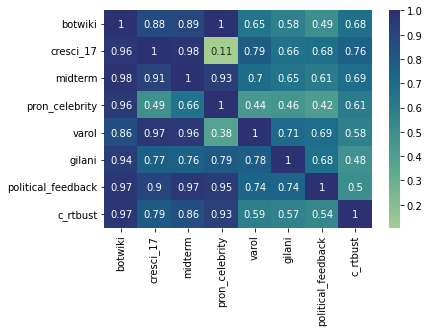

In [ ]:
names = ["botwiki", "cresci_17", "midterm", "pron_celebrity", "varol", "gilani", "political_feedback", "c_rtbust"]
sns.heatmap(heatmap_array, annot=True, xticklabels=names, yticklabels=names, cmap="crest")